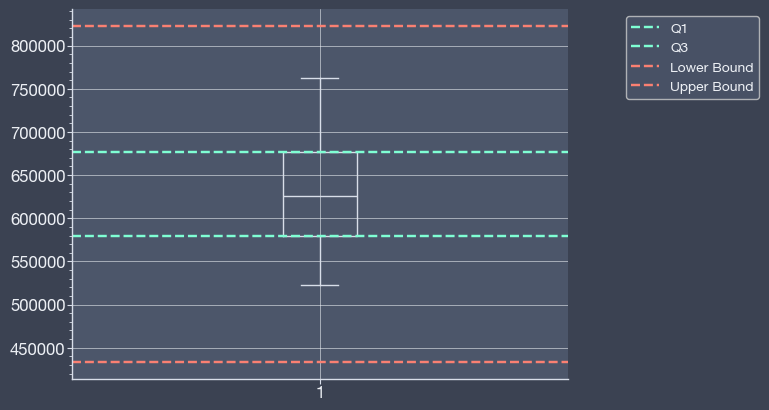

The average emissions level over the specified period is 629422.90625 units.There is a moderate amount of variability in the emissions data, with emissions values typically deviating from the average by approximately 56625.66070844867 units.
The maximum value is 762474 carbon dioxide equivalents (CO2e), as established by the United Nations Framework Convention on Climate Change (UNFCCC), corresponding to the year of 2011
The minimum value is 523162 carbon dioxide equivalents (CO2e), corresponding to the year of 1994
Lower bound for outliers: 433553.875
Upper bound for outliers: 822766.875
Outliers: Empty DataFrame
Columns: [sector, time, Greenlands total emission of greenhousegasses]
Index: []
There are not outliers in this dataset


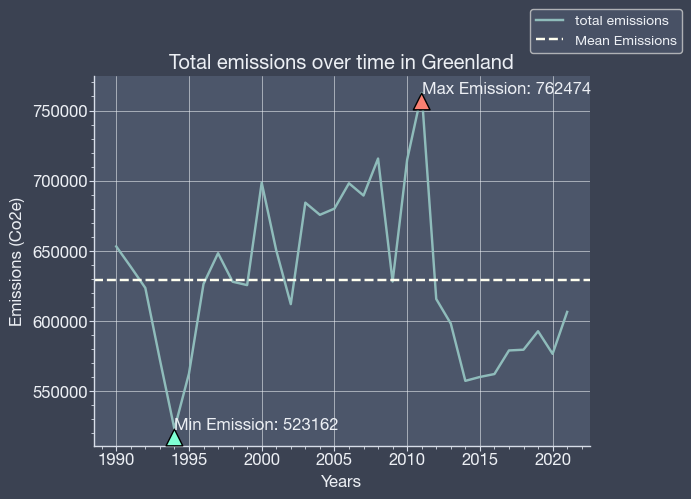

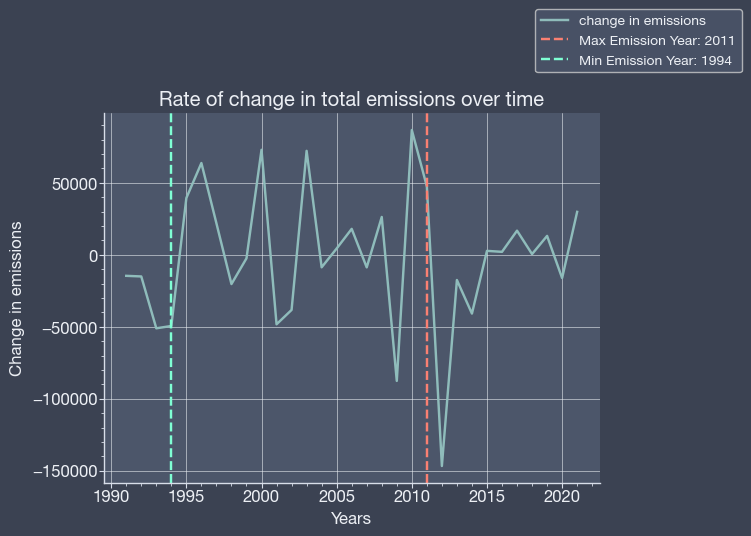

R-squared: 0.6160066600364945
RMSE: 34536.747306330726
Slope of Regression Line: 100836687070028.86


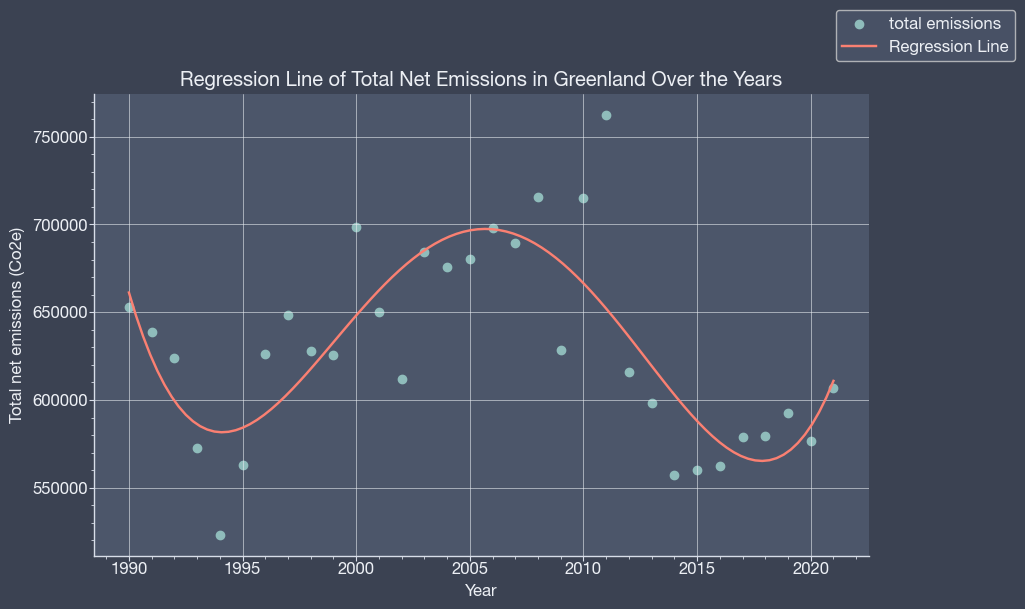

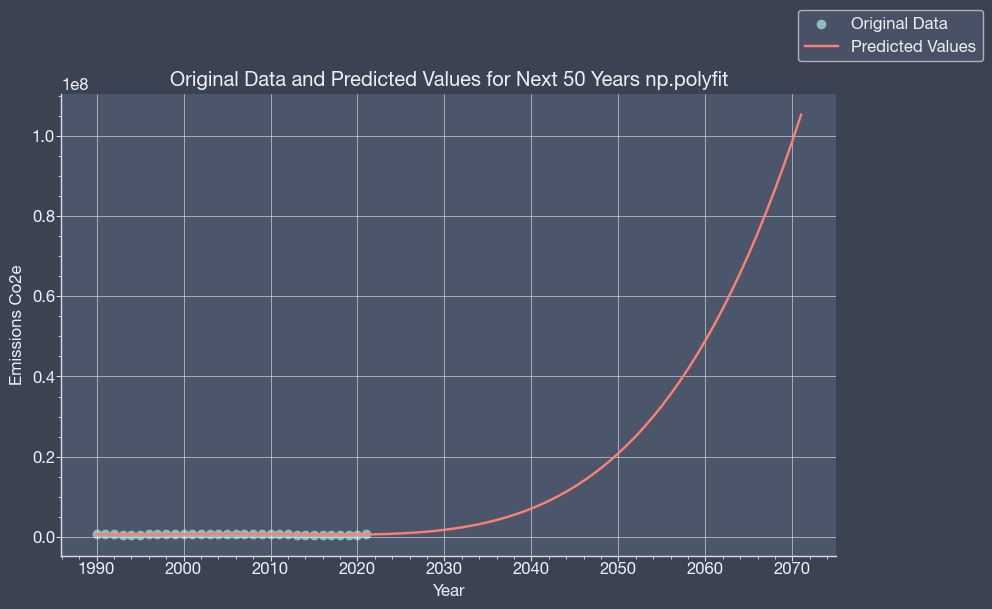

In [133]:
%run greenland_greenhouse_emissions_total.ipynb

In [134]:
waste_df = df[df['sector'].isin(['Total (net emissions)', '4. Waste', '  4.A Solid waste disposal ', '  4.B Waste Water', '  4.C Other Waste'])]
waste_df = waste_df.drop(columns=['greenhousegas'])

In [135]:
#get the mean value for waste emissions over the period between 1990-2020
mean_waste_emissions = waste_df[waste_df['sector'] == '4. Waste']['Greenlands total emission of greenhousegasses'].mean()
std_dev_waste_emissions = waste_df[waste_df['sector'] == '4. Waste']['Greenlands total emission of greenhousegasses'].std()

print(f'The average waste emissions level over the specified period is {mean_waste_emissions} units.\
There is a relatively low amount of variability in the emissions data, with emissions values typically deviating \
from the average by approximately {std_dev_waste_emissions} units.')

#select only total fuel emissions, not divided by sub-sector
total_waste_emissions = waste_df[waste_df['sector'] == '4. Waste']

#Find the index of the maximum value
max_index = total_waste_emissions['Greenlands total emission of greenhousegasses'].idxmax()

# Get the corresponding year value using the index
max_year = waste_df.loc[max_index, 'time']

# Get the maximum value
max_value = total_waste_emissions['Greenlands total emission of greenhousegasses'].max()

print(f'The maximum value of fuel emissions is {max_value} carbon dioxide equivalents (CO2e),corresponding to the year of {max_year}')

#Find the index of the minimum value
min_index = total_waste_emissions['Greenlands total emission of greenhousegasses'].idxmin()

# Get the corresponding year value using the index
min_year = waste_df.loc[min_index, 'time']

# Get the minimum value
min_value = total_waste_emissions['Greenlands total emission of greenhousegasses'].min()

print(f'The minimum value is {min_value} carbon dioxide equivalents (CO2e), corresponding to the year of {min_year}')

The average waste emissions level over the specified period is 17212.90625 units.There is a relatively low amount of variability in the emissions data, with emissions values typically deviating from the average by approximately 1318.7691074139382 units.
The maximum value of fuel emissions is 19206 carbon dioxide equivalents (CO2e),corresponding to the year of 1998
The minimum value is 14850 carbon dioxide equivalents (CO2e), corresponding to the year of 2015


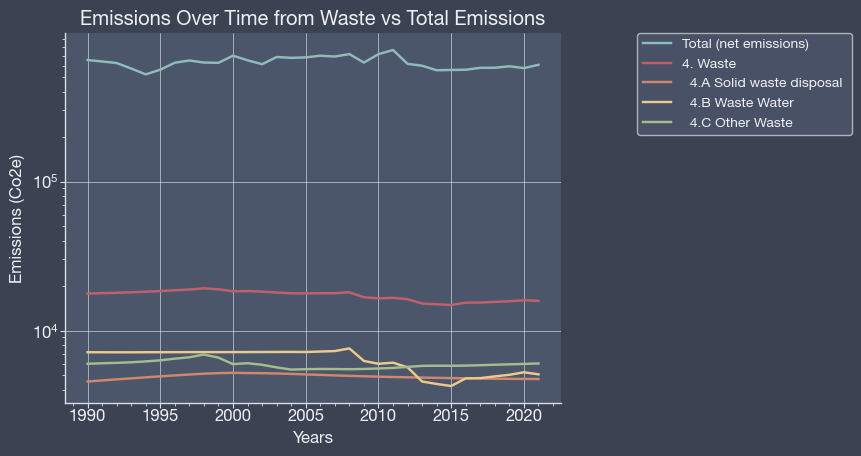

In [136]:
# Iterate over unique values in the 'sector' column
for sector in waste_df['sector'].unique():
    # Filter rows for the current sector
    sector_df = waste_df[waste_df['sector'] == sector]
    # Plot the emissions against date for the current sector
    plt.plot(sector_df['time'], sector_df['Greenlands total emission of greenhousegasses'], label=sector)

plt.yscale('log')

plt.xlabel('Years')

plt.ylabel('Emissions (Co2e)')

plt.title('Emissions Over Time from Waste vs Total Emissions')

plt.legend(loc="upper right", fontsize="small", bbox_to_anchor=(1.6, 1.02))

plt.savefig('Emissions over time from waste versus total.jpg', bbox_inches='tight')

plt.show()

Plot without total net emission to have a clearer understanding of the individuals curves:

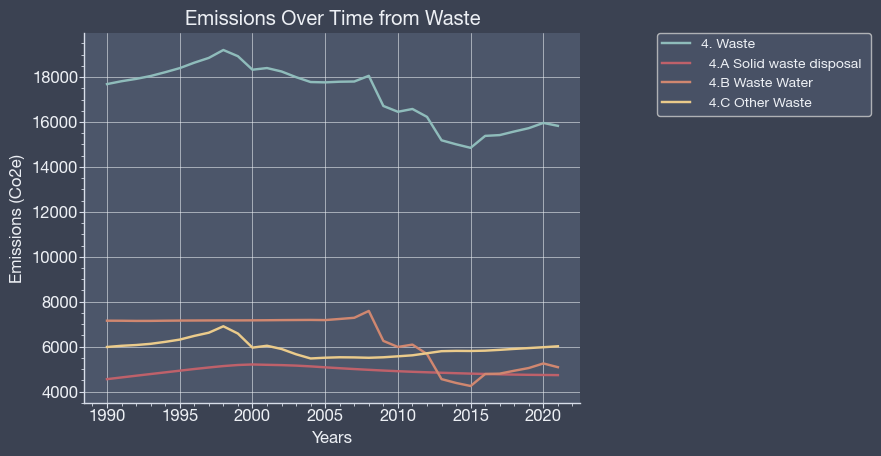

In [137]:
waste2_df = df[df['sector'].isin(['4. Waste', '  4.A Solid waste disposal ', '  4.B Waste Water', '  4.C Other Waste'])]

# Iterate over unique values in the 'sector' column
for sector in waste2_df['sector'].unique():
    # Filter rows for the current sector
    sector_df = waste2_df[waste2_df['sector'] == sector]
    # Plot the emissions against date for the current sector
    plt.plot(sector_df['time'], sector_df['Greenlands total emission of greenhousegasses'], label=sector)

plt.xlabel('Years')

plt.ylabel('Emissions (Co2e)')

plt.title('Emissions Over Time from Waste')

plt.legend(loc="upper right", fontsize="small", bbox_to_anchor=(1.6, 1.02))

plt.savefig('Emissions over time from different waste sources.jpg', bbox_inches='tight')

plt.show()

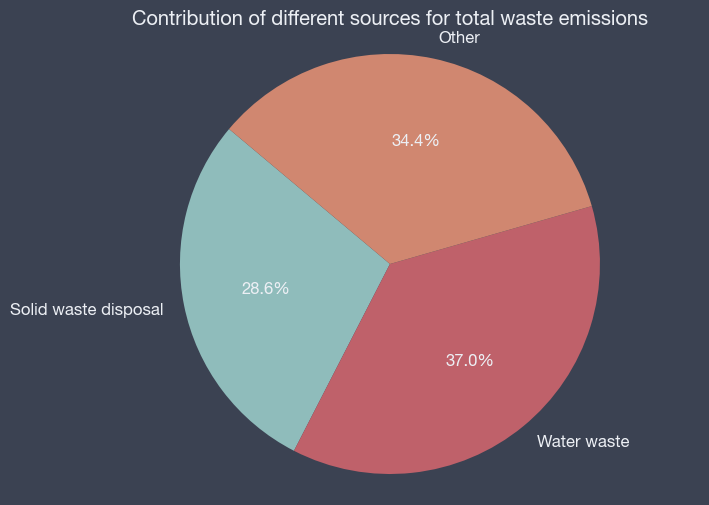

In [138]:
total_emissions = waste_df[waste_df['sector'] == '4. Waste']['Greenlands total emission of greenhousegasses'].sum().sum()
solid_waste_disposal_emissions = waste_df[waste_df['sector'] == '  4.A Solid waste disposal ']['Greenlands total emission of greenhousegasses'].sum()
waste_water_emissions = waste_df[waste_df['sector'] == '  4.B Waste Water']['Greenlands total emission of greenhousegasses'].sum()
other_waste_emissions = waste_df[waste_df['sector'] == '  4.C Other Waste']['Greenlands total emission of greenhousegasses'].sum()


# Calculate the percentage of solid waste disposal emissions
percentage_solid_waste_emissions = (solid_waste_disposal_emissions / total_emissions) * 100

# Calculate the percentage of waste water emissions
percentage_waste_water_emissions = (waste_water_emissions / total_emissions) * 100

# Calculate the percentage of emissions from other waste sources
percentage_other_waste_emissions = (other_waste_emissions / total_emissions) * 100

# Create labels for the pie chart
labels = ['Solid waste disposal', 'Water waste', 'Other']

# Create sizes for the pie chart
sizes = [percentage_solid_waste_emissions, percentage_waste_water_emissions, percentage_other_waste_emissions]

# Create the pie chart
plt.figure(figsize=(8, 6))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.title('Contribution of different sources for total waste emissions')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('Contribution of different sources for total waste emissions.jpg', bbox_inches='tight')

plt.show()